In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.preprocessing as preprocessing

**Load Dataset**

In [4]:
df1=pd.read_csv('/content/drive/MyDrive/miniproject/dataset/Churn_Modelling.csv')

In [5]:
df1.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df1.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,10000,15628319,Walker,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [7]:
df1.shape

(10000, 14)

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [9]:
df1.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [10]:
df1.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000


In [11]:
df1.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [12]:
df1.duplicated().sum()

0

In [13]:
df1.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [14]:
import numpy as np
from scipy import stats

**Histogram**

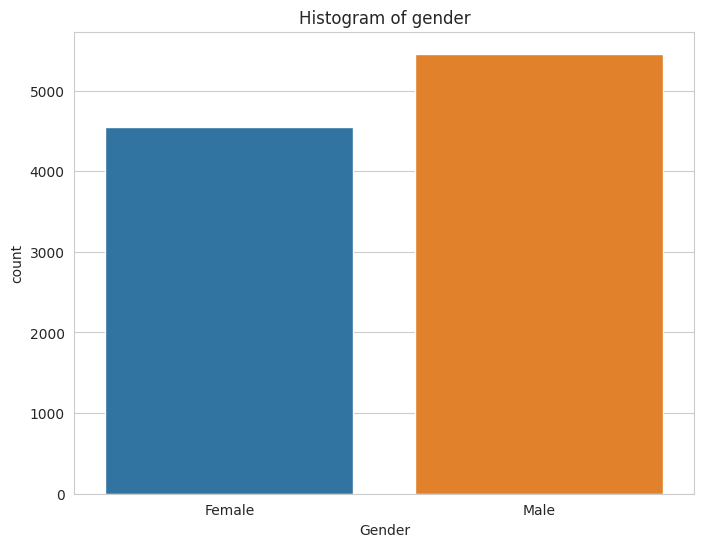

In [15]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of gender")
sns.countplot(x='Gender', data=df1)
plt.show()

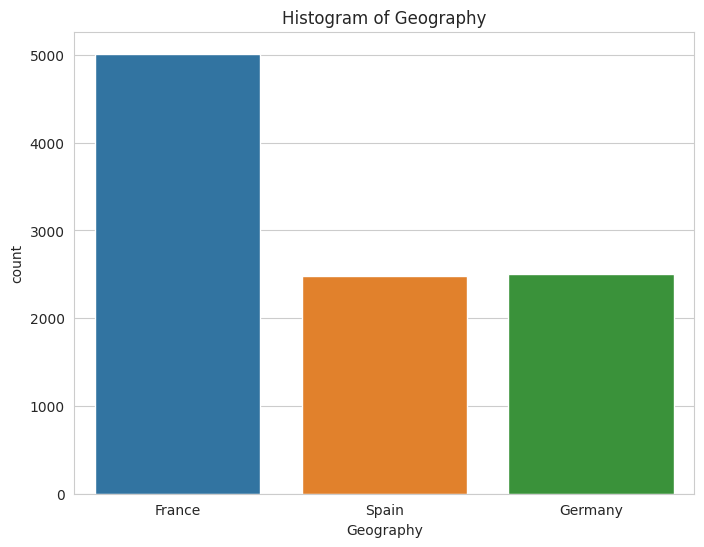

In [147]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Geography")
sns.countplot(x='Geography', data=df1)
plt.show()

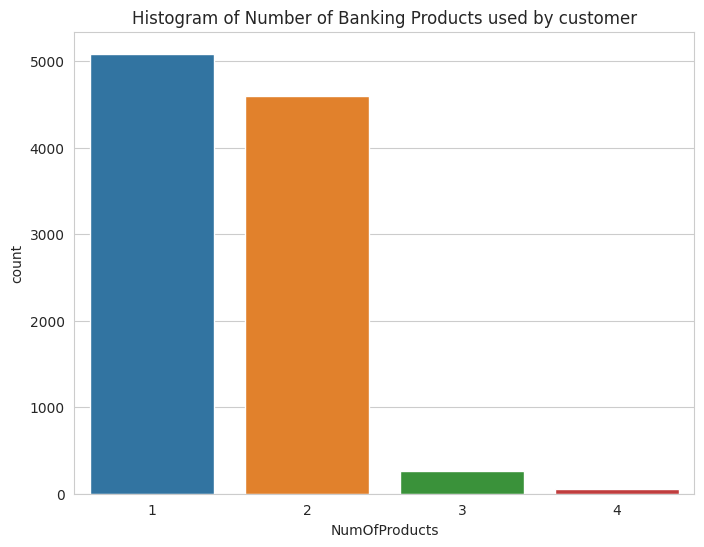

In [148]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Number of Banking Products used by customer")
sns.countplot(x='NumOfProducts', data=df1)
plt.show()

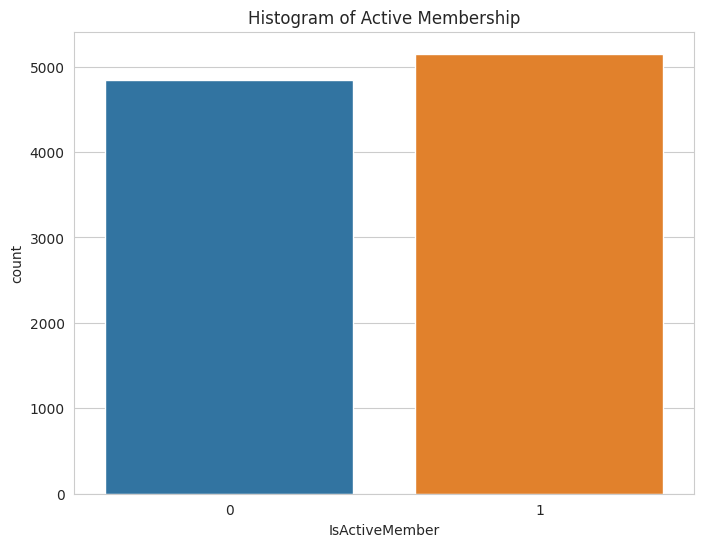

In [149]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Active Membership")
sns.countplot(x='IsActiveMember', data=df1)
plt.show()

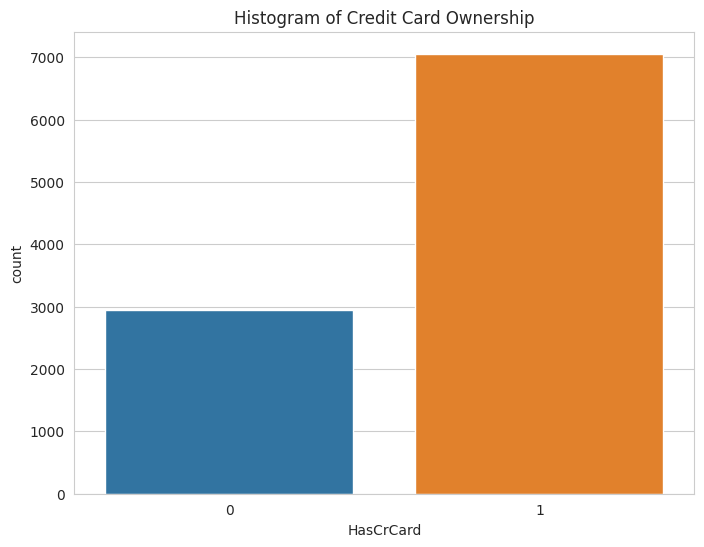

In [150]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Credit Card Ownership")
sns.countplot(x='HasCrCard', data=df1)
plt.show()

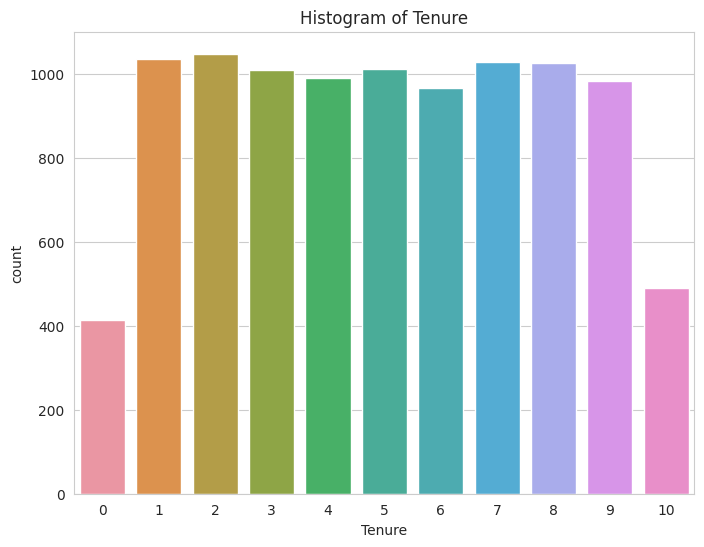

In [151]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Tenure")
sns.countplot(x='Tenure', data=df1)
plt.show()

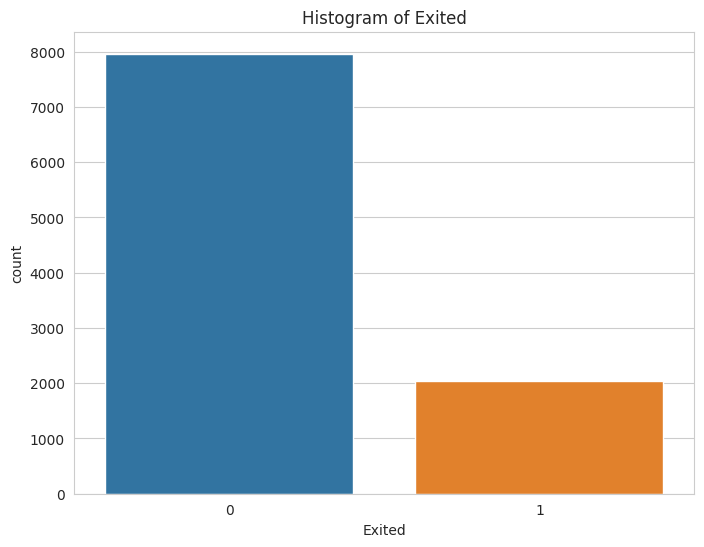

In [152]:
plt.figure(figsize=(8, 6))
sns.set_style('whitegrid')
plt.title("Histogram of Exited")
sns.countplot(x='Exited', data=df1)
plt.show()

**Boxplot**

<Axes: xlabel='Exited', ylabel='Tenure'>

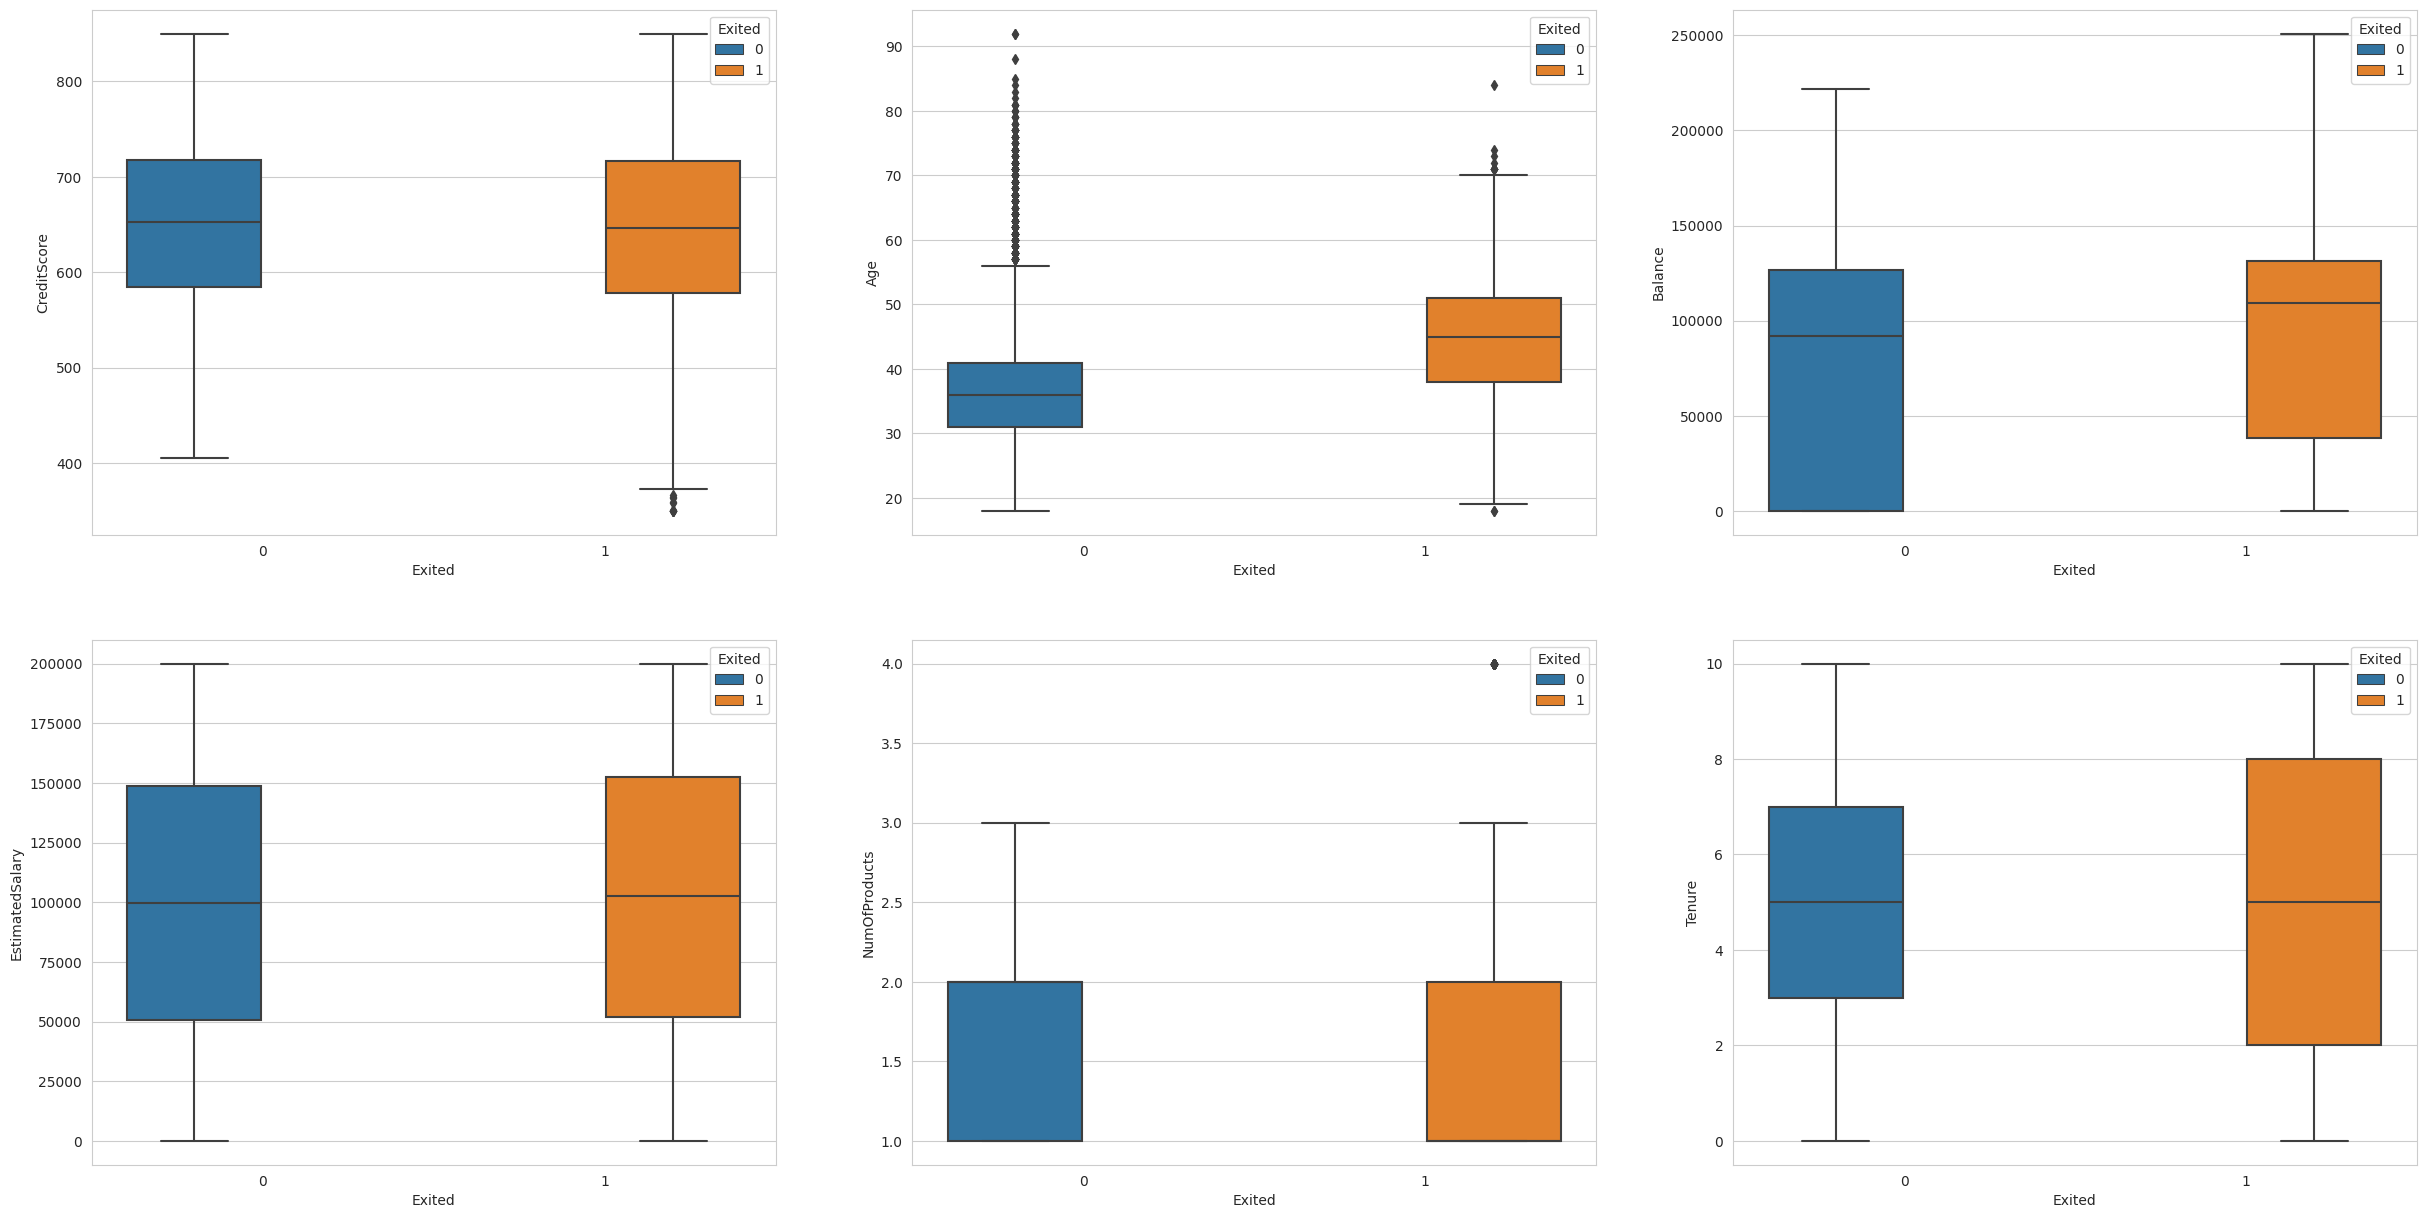

In [22]:

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df1, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df1, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df1, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df1, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df1, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df1, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

**Outliers**

In [23]:
numerical_features = ['Age', 'CreditScore','NumOfProducts', 'Tenure', 'Balance', 'EstimatedSalary', 'HasCrCard', 'IsActiveMember']

# Calculate IQR for each numerical feature
Q1 = df1[numerical_features].quantile(0.25)
Q3 = df1[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df1[numerical_features] < lower_bound) | (df1[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
Age                359
CreditScore         15
NumOfProducts       60
Tenure               0
Balance              0
EstimatedSalary      0
HasCrCard            0
IsActiveMember       0
dtype: int64


In [24]:
# Calculate Q1 and Q3 for each column
Q1 = df1[['Age', 'CreditScore','NumOfProducts']].quantile(0.25)

Q3 = df1[['Age', 'CreditScore','NumOfProducts']].quantile(0.75)

# Calculate IQR for each column
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from specific columns
df = df1[
    (df1['Age'] >= lower_bound['Age']) & (df1['Age'] <= upper_bound['Age']) &
    (df1['CreditScore'] >= lower_bound['CreditScore']) & (df1['CreditScore'] <= upper_bound['CreditScore']) &
    (df1['NumOfProducts'] >= lower_bound['NumOfProducts']) & (df1['NumOfProducts'] <= upper_bound['NumOfProducts'])
]

# Print the shape of the new dataframe without outliers
print("Shape of DataFrame after removing outliers:", df.shape)

Shape of DataFrame after removing outliers: (9568, 14)


In [25]:
numerical_features = ['Age', 'CreditScore','NumOfProducts']

# Calculate IQR for each numerical feature
Q1 = df[numerical_features].quantile(0.25)
Q3 = df[numerical_features].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds to identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count outliers for each feature
outliers_count = ((df[numerical_features] < lower_bound) | (df[numerical_features] > upper_bound)).sum()

print("Number of outliers for each feature:")
print(outliers_count)

Number of outliers for each feature:
Age              163
CreditScore        1
NumOfProducts      0
dtype: int64


In [26]:
df.shape

(9568, 14)

**Boxplot after removing outliers**

<Axes: xlabel='Exited', ylabel='Tenure'>

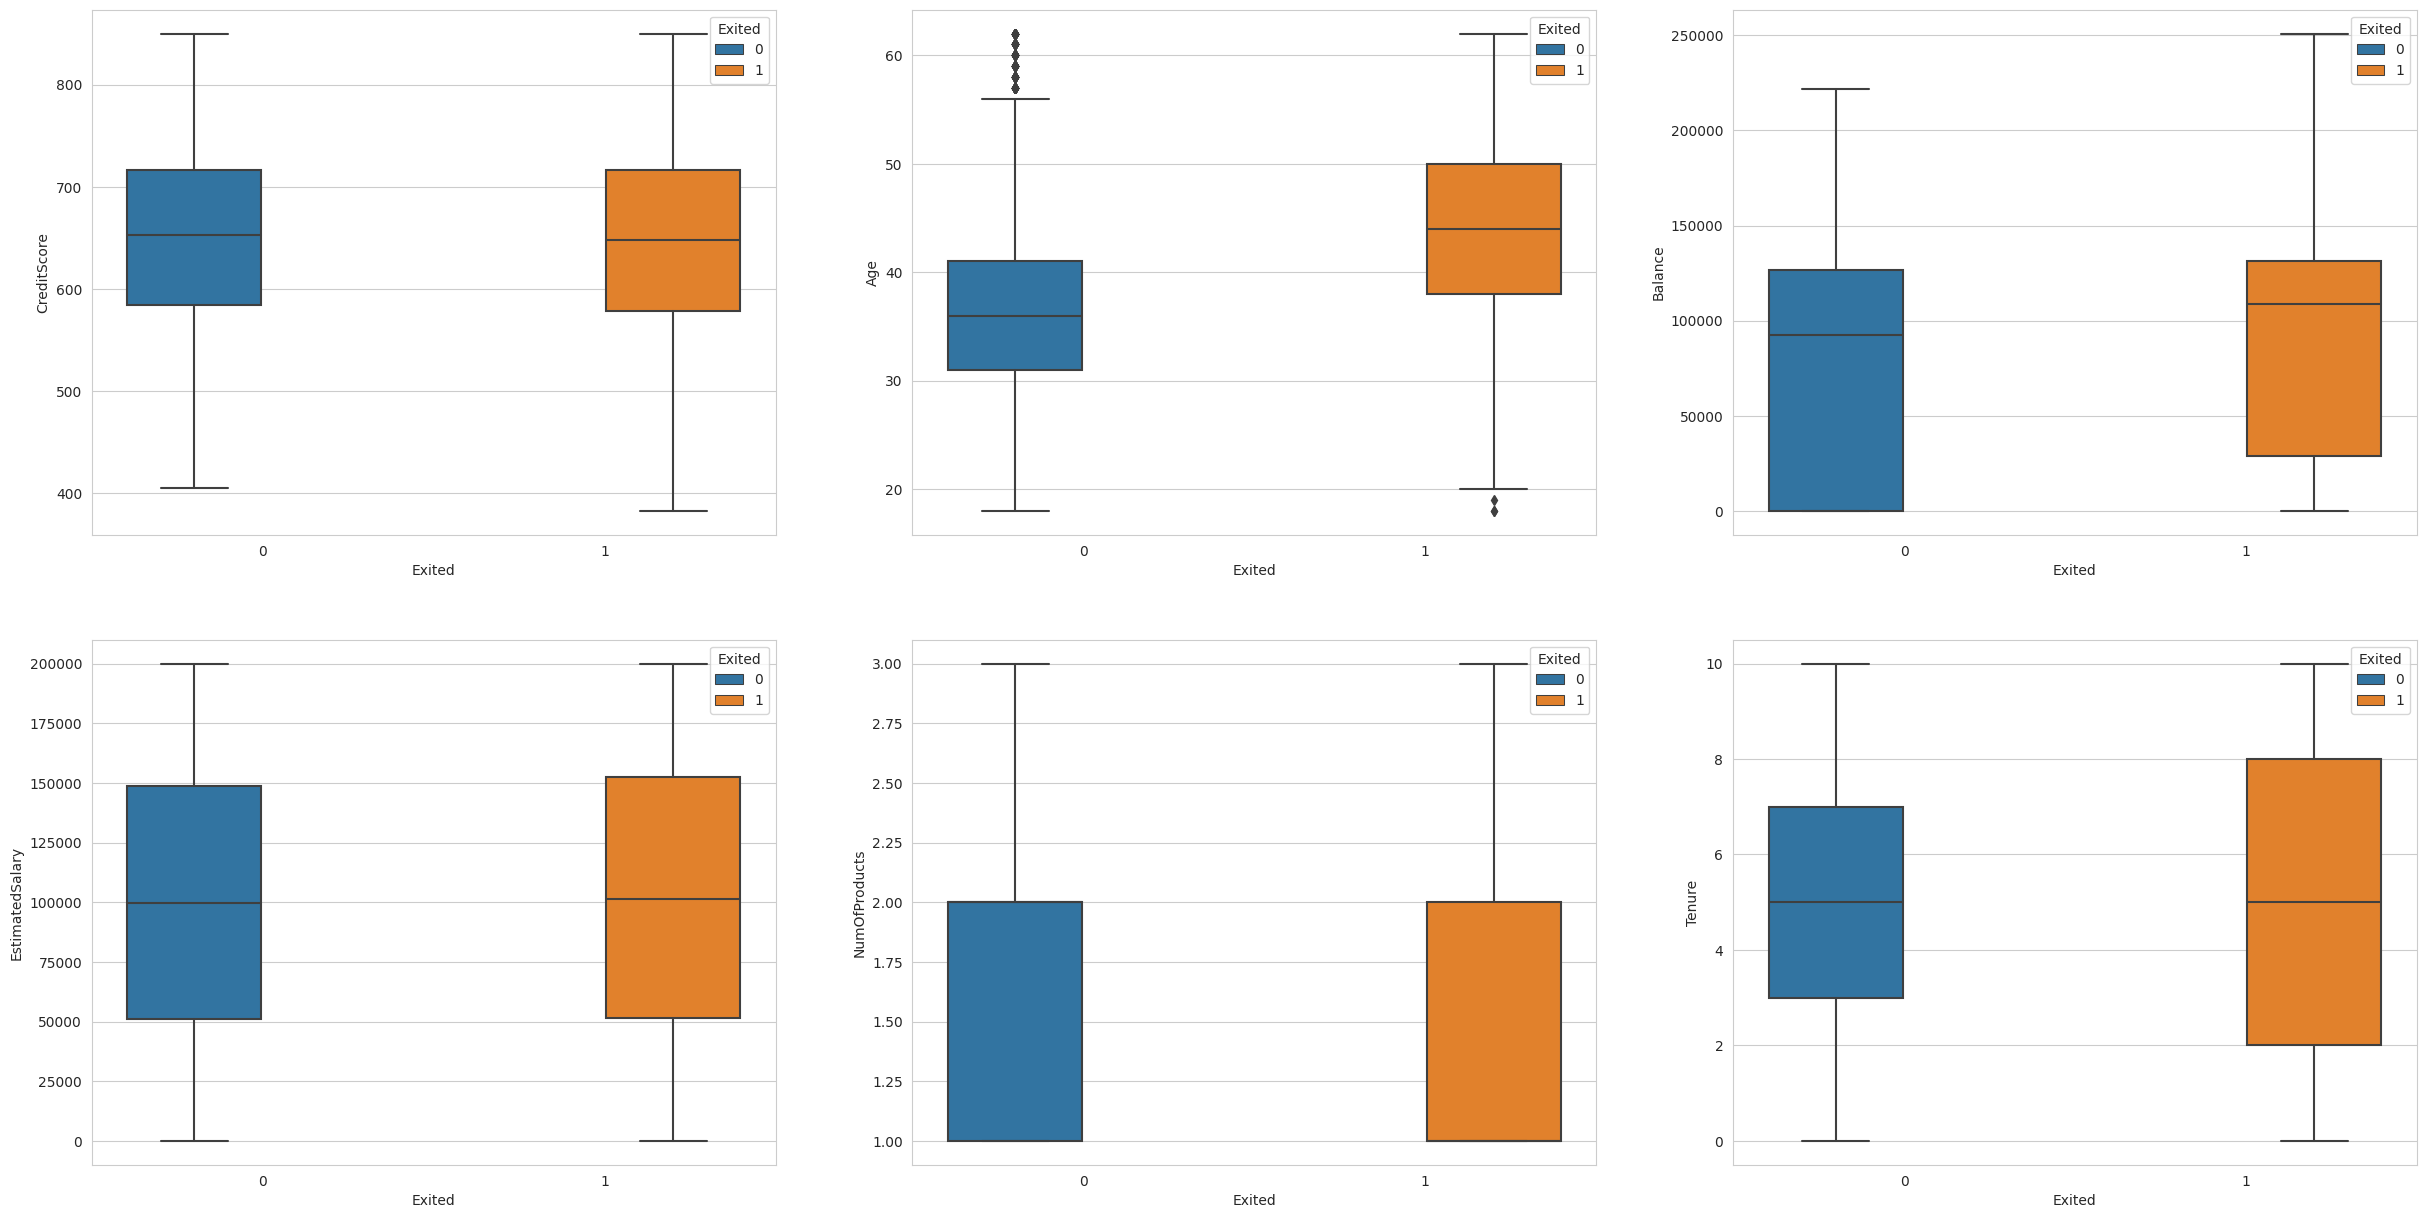

In [27]:

fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.boxplot(data=df, x='Exited', y='CreditScore', hue='Exited', ax=ax[0][0])
sns.boxplot(data=df, x='Exited', y='Age', hue='Exited', ax=ax[0][1])
sns.boxplot(data=df, x='Exited', y='Balance', hue='Exited', ax=ax[0][2])
sns.boxplot(data=df, x='Exited', y='EstimatedSalary', hue='Exited', ax=ax[1][0])
sns.boxplot(data=df, x='Exited', y='NumOfProducts', hue='Exited', ax=ax[1][1])
sns.boxplot(data=df, x='Exited', y='Tenure', hue='Exited', ax=ax[1][2])

**Countplot**

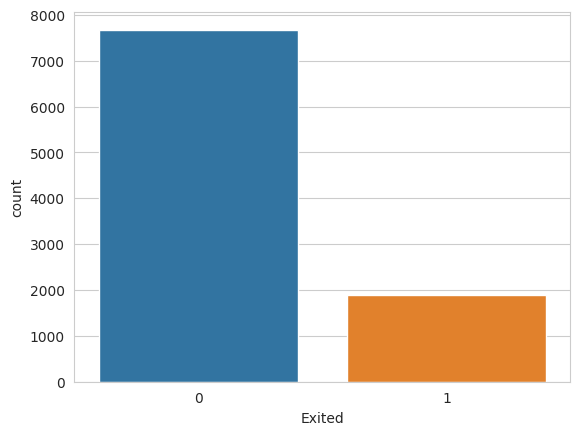

In [28]:
sns.countplot(x='Exited', data=df)
plt.show()

In [29]:
df['Exited'].value_counts()

0    7677
1    1891
Name: Exited, dtype: int64

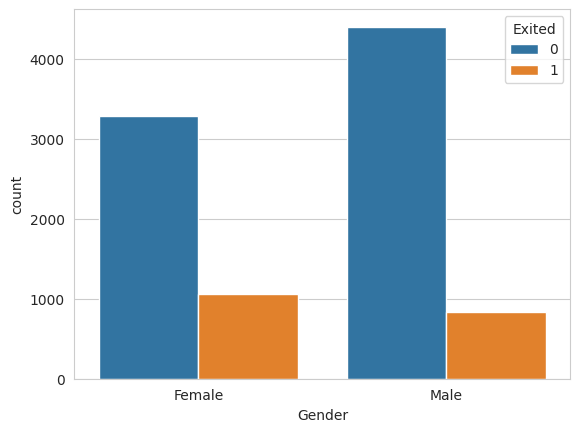

In [30]:
sns.countplot(x="Gender", hue="Exited", data=df)
plt.show()

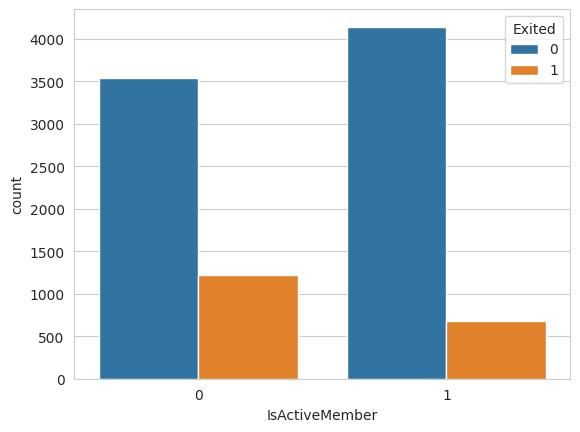

In [31]:
sns.countplot(x="IsActiveMember", hue="Exited", data=df)
plt.show()

<Axes: xlabel='Tenure', ylabel='count'>

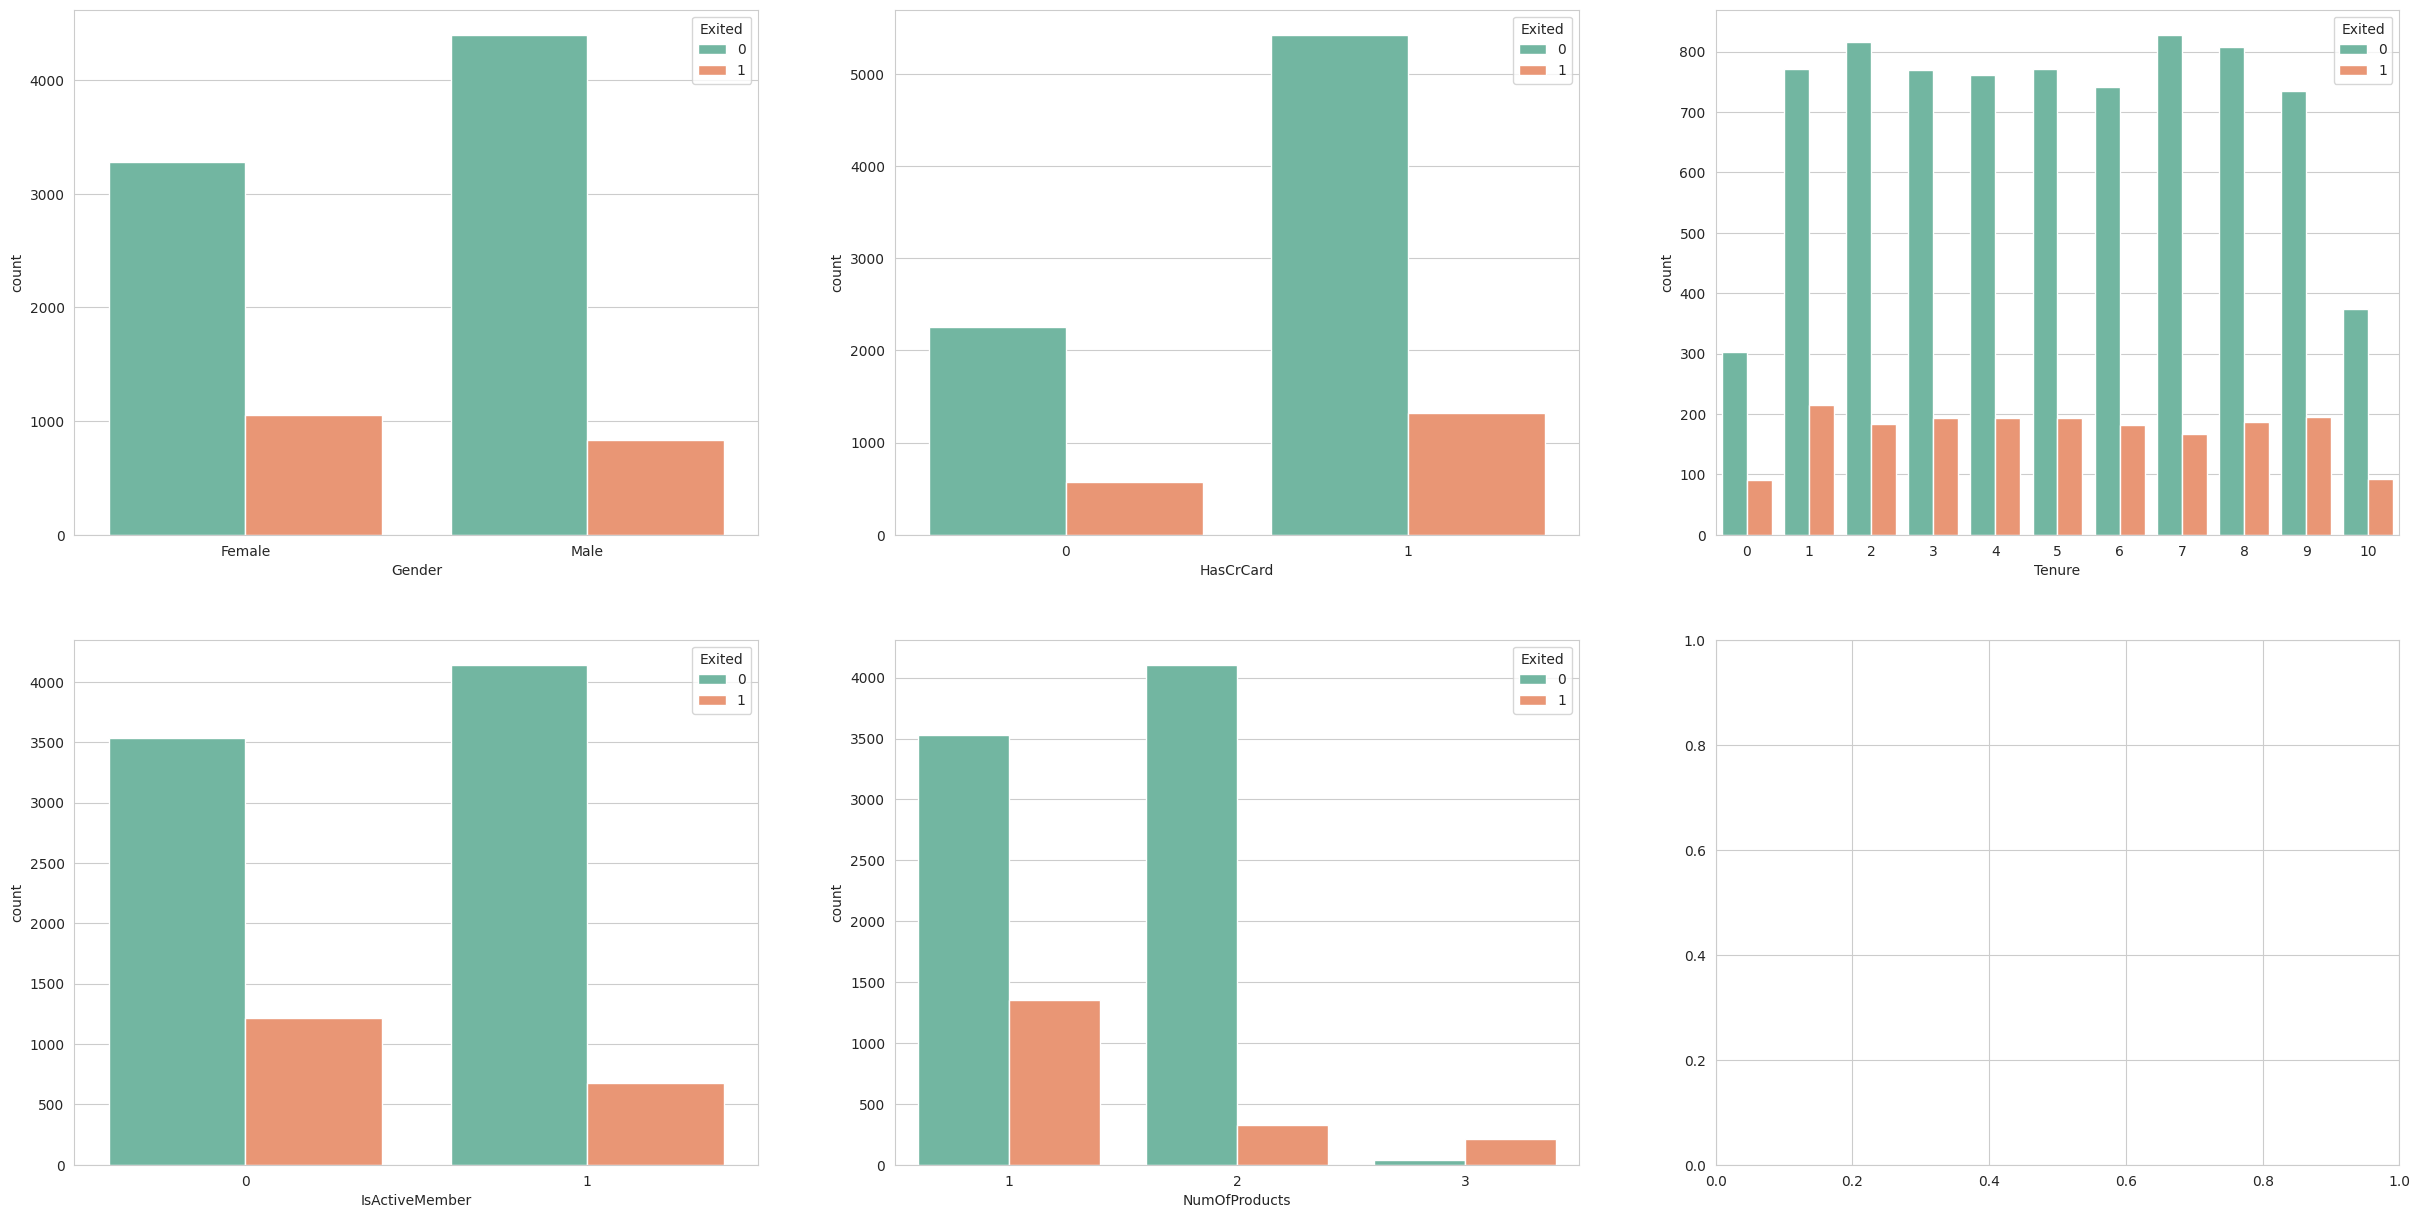

In [32]:
fig, ax = plt.subplots(2, 3, figsize=(30, 15))

sns.countplot(x='Gender', hue='Exited', data=df, palette='Set2', ax=ax[0][0])
sns.countplot(x='HasCrCard', hue='Exited', data=df, palette='Set2', ax=ax[0][1])
sns.countplot(x='IsActiveMember', hue='Exited', data=df, palette='Set2', ax=ax[1][0])
sns.countplot(x='NumOfProducts', hue='Exited', data=df, palette='Set2', ax=ax[1][1])
sns.countplot(x='Tenure', hue='Exited', data=df, palette='Set2', ax=ax[0][2])

**Label Encoding**

In [33]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [34]:
encoder = preprocessing.LabelEncoder()
df["Gender"] = encoder.fit_transform(df["Gender"])
df["Geography"] = encoder.fit_transform(df["Geography"])

<ipython-input-34-5f7859c9d956>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Gender"] = encoder.fit_transform(df["Gender"])
<ipython-input-34-5f7859c9d956>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Geography"] = encoder.fit_transform(df["Geography"])


In [35]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,2,0,43,2,125510.82,1,1,1,79084.10,0


**Correlation Matrix**

<ipython-input-36-1b9b85051144>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")


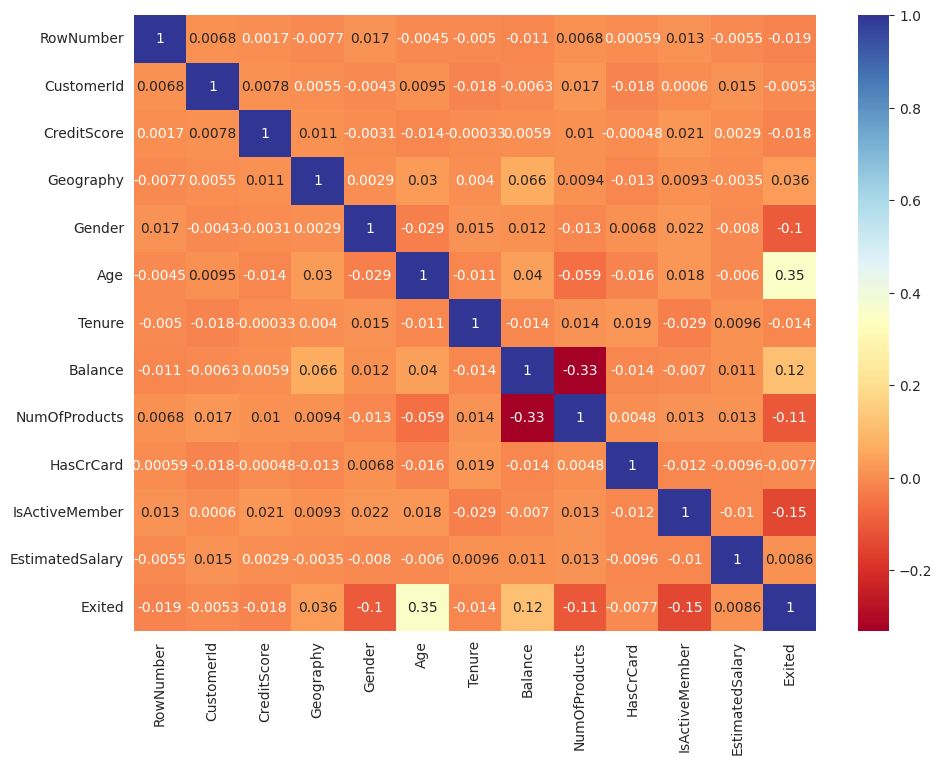

In [36]:
# checking correlation matrix with heatmap
import matplotlib.pyplot as plt
import seaborn as sns

plt.subplots(figsize=(11,8))
sns.heatmap(df.corr(), annot=True, cmap="RdYlBu")
plt.show()

**Dropping irrelevant features**

In [37]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname','Geography'],axis=1)

In [38]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,39,1,0.00,2,0,0,93826.63,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0


In [39]:
X = df.drop('Exited',axis=1)
y = df['Exited']

**Balancing target variable exited**

In [40]:
from imblearn.over_sampling import SMOTE

In [41]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [42]:
y_res.value_counts()

1    7677
0    7677
Name: Exited, dtype: int64

In [43]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [44]:
print(X.shape, X_train.shape, X_test.shape)

(9568, 9) (12283, 9) (3071, 9)


In [45]:
print(y.shape, y_train.shape, y_test.shape)

(9568,) (12283,) (3071,)


**Feature scaling**

In [46]:
from sklearn.preprocessing import StandardScaler

In [47]:

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)


In [48]:
X_train = pd.DataFrame(X_train)
X_train.head()

,0,1,2,3,4,5,6,7,8
0,0.563945,1.193564,-0.209388,1.171629,0.866315,-0.731577,0.779431,-0.741556,-1.715007
1,-0.068961,1.193564,2.523535,1.538366,-1.338454,1.156626,-1.282988,-0.741556,0.965598
2,-0.202205,1.193564,-0.209388,0.804892,-1.338454,1.156626,0.779431,-0.741556,1.411900
3,0.286355,-0.837827,-0.209388,-1.395529,0.362688,-0.731577,-1.282988,-0.741556,-1.354826
4,0.086489,1.193564,0.246099,0.071419,-0.660179,-0.731577,0.779431,-0.741556,0.221769


**MODELS**

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score,f1_score

**DecisionTree**

In [50]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [51]:
y_pred1 = dt.predict(X_test)

In [52]:
accuracy_score(y_test,y_pred1)

0.7844350374470856

In [53]:
precision_score(y_test,y_pred1)

0.7651563497128271

In [54]:
recall_score(y_test,y_pred1)

0.8030810448760884

In [55]:
f1_score(y_test,y_pred1)

0.7836601307189541

**Random Forest**

In [104]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=300,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=300, random_state=42)

In [105]:
y_pred2 = rf.predict(X_test)

In [106]:
accuracy_score(y_test,y_pred2)

0.8567241940735917

In [107]:
precision_score(y_test,y_pred2)

0.8521739130434782

In [108]:
recall_score(y_test,y_pred2)

0.8533154722036169

In [109]:
f1_score(y_test,y_pred2)

0.8527443105756359

**KNN**

In [110]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [111]:
y_pred3 = knn.predict(X_test)

In [112]:
accuracy_score(y_test,y_pred3)

0.8140670791273201

In [113]:
precision_score(y_test,y_pred3)

0.7928843710292249

In [114]:
recall_score(y_test,y_pred3)

0.8359008707300737

In [115]:
f1_score(y_test,y_pred3)

0.813824584284317

**Logistic regression**

In [116]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [117]:
y_pred4 = log.predict(X_test)

In [118]:
accuracy_score(y_test,y_pred4)

0.7929013350700098

In [119]:
precision_score(y_test,y_pred4)

0.7777057679844459

In [120]:
recall_score(y_test,y_pred4)

0.8037508372404555

In [121]:
f1_score(y_test,y_pred4)

0.7905138339920947

**compare accuracy of models**

In [122]:
accuracy=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'ACC':[accuracy_score(y_test,y_pred1),
                              accuracy_score(y_test,y_pred2),
                              accuracy_score(y_test,y_pred3),
                              accuracy_score(y_test,y_pred4)]})

In [123]:
accuracy

,Models,ACC
0,DecisionTree,0.784435
1,RandomForest,0.856724
2,KNN,0.814067
3,LogisticRegression,0.792901


**Compare presision of models**

In [124]:
precision=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'PR':[precision_score(y_test,y_pred1),
                              precision_score(y_test,y_pred2),
                              precision_score(y_test,y_pred3),
                              precision_score(y_test,y_pred4)]})

In [125]:
precision

,Models,PR
0,DecisionTree,0.765156
1,RandomForest,0.852174
2,KNN,0.792884
3,LogisticRegression,0.777706


**compare recall value of models**

In [126]:
recall=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'RV':[recall_score(y_test,y_pred1),
                              recall_score(y_test,y_pred2),
                              recall_score(y_test,y_pred3),
                              recall_score(y_test,y_pred4)]})

In [127]:
recall

,Models,RV
0,DecisionTree,0.803081
1,RandomForest,0.853315
2,KNN,0.835901
3,LogisticRegression,0.803751


**Compare F1 score of models**

In [128]:
F1=pd.DataFrame({'Models':['DecisionTree','RandomForest','KNN','LogisticRegression'],
                        'F1S':[f1_score(y_test,y_pred1),
                              f1_score(y_test,y_pred2),
                              f1_score(y_test,y_pred3),
                              f1_score(y_test,y_pred4)]})

In [129]:
F1

,Models,F1S
0,DecisionTree,0.783660
1,RandomForest,0.852744
2,KNN,0.813825
3,LogisticRegression,0.790514


**Barchart of evaluation metrics**

In [130]:
import seaborn as sns

<Axes: xlabel='Models', ylabel='ACC'>

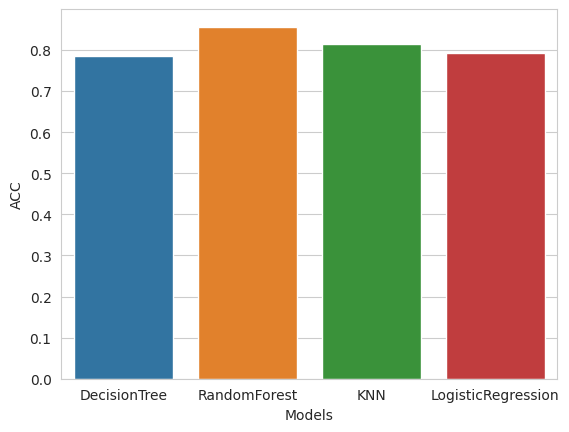

In [131]:
sns.barplot(x = 'Models', y = 'ACC', data = accuracy)

<Axes: xlabel='Models', ylabel='PR'>

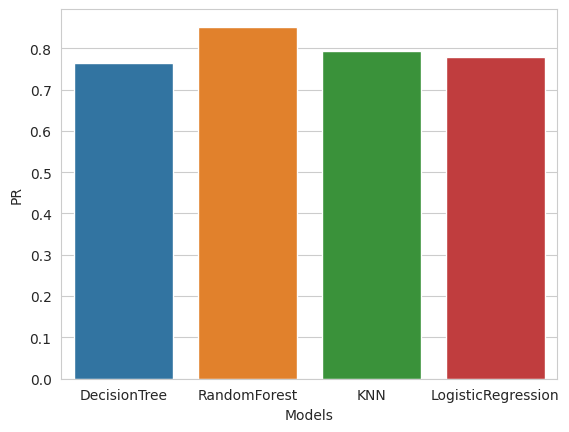

In [132]:
sns.barplot(x = 'Models', y = 'PR', data = precision)

<Axes: xlabel='Models', ylabel='RV'>

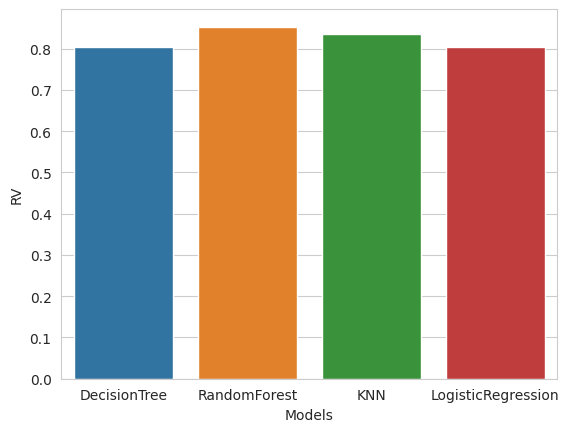

In [133]:
sns.barplot(x = 'Models', y = 'RV', data = recall)

<Axes: xlabel='Models', ylabel='F1S'>

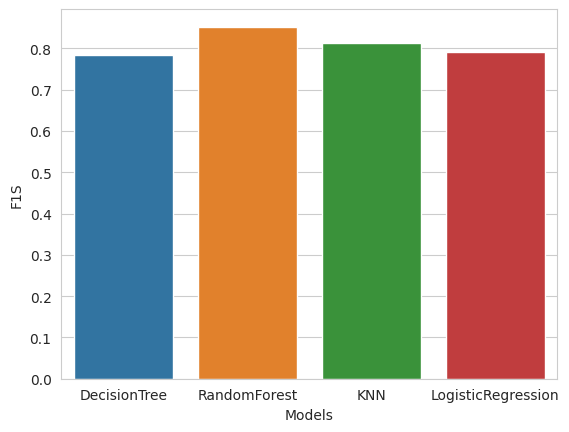

In [134]:
sns.barplot(x = 'Models', y = 'F1S', data = F1)